# Salary Linear Regression

## Introduction
This jupyter notebook is for learning purposes and you might learn something from this as well.
I will try to explain everything you see in this notebook.

## Dependencies

In [2]:
# using pandas for reading the csv file
import pandas as pd
# using numpy for easier calculations
import numpy as np
# using matplotlib for plotting
import matplotlib.pyplot as plt

## Dataset

This dataset is generated and only for testing purposes. You can see in the following cell, how I load the file with its data.

We have the following data:
* 'experience' - experience in years for the employee
* 'salary' - what salary he had in month

In [4]:
# read data from file
housing_data = pd.read_csv('salary.csv')
# print the first 5 elements in the data
print(housing_data.head())

   experience  salary
0         0.5    2500
1         0.0    2250
2         1.0    2750
3         5.0    8000
4         8.0    9000


Display data of the csv file by using matplotlib and the scatter function.

Also getting x and y for further computations.

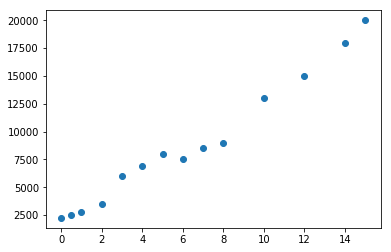

In [29]:
# defining x and y
x = housing_data['experience']
y = housing_data['salary']

# plot a normal scatter graph
plt.scatter(x, y)
plt.show()

<h2>Formular for calculating the error</h2>
<img src="resources/error.png" />

In [30]:
def compute_error(b, m, x_points, y_points):
    total_error = 0
    for i in range(0, len(x_points)):
        # get x and y for the point in the graph
        x = x_points[i]
        y = y_points[i]
        # add the current error to the total error using error linear regression
        total_error += (y - (m * x + b)) ** 2
    # divide by the length of the points to get a more accurate value
    return total_error / float(len(x_points)) 

<h2>Gradient Descent formular with derivative</h2>
<img src="resources/gradient_descent.png" />

In [31]:
def step_gradient(b_current, m_current, x_points, y_points, learning_rate):
    # define initial values
    b_gradient = 0
    m_gradient = 0
    # how many elements are in the list
    N = float(len(x_points))
    for i in range(0, len(x_points)):
        # get x and y for the specific point
        x = x_points[i]
        y = y_points[i]
        
        # calculate b and m by using the partial derivative of the linear regression function
        b_gradient += -(2 / N) * (y - (m_current * x + b_current))
        m_gradient += -(2 / N) * x * (y - (m_current * x + b_current))
    # set the new b and m by multiplying the learning rate to the gradient for avoiding overfitting
    # then calculate the difference between the current gradient and new gradient by getting the actual new b and m
    new_b = b_current - learning_rate * b_gradient
    new_m = m_current - learning_rate * m_gradient
    return [new_b, new_m]

Here the learning happens.

We loop through something called 'epochs' which are the number of iterations to learn.

Then we plot it with matplotlib scatter function and we are displaying the linear function of the learned parameters b and m.

In addition, we are trying to predict the salary for 20 years of experience.

Starting gradient descent at b = 0, m = 0, error = 107588214.28571428
Running...
After 10000 iterations b = 928.3237567950539, m = 1212.8323262814088, error = 886620.4606040146


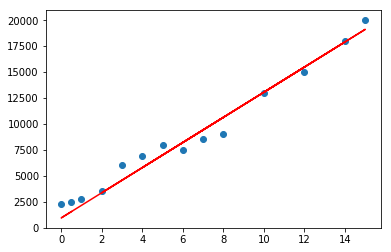

Next Salary: 25184.970282423226


In [35]:
# define learning rate for not overfitting
learning_rate = 0.0001
# epochs - number of iterations for this algorithm to calculate
epochs = 10000
# initial values for m and b
b = 0
m = 0

print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(b, m, compute_error(b, m, x, y)))
print("Running...")

for i in range(epochs):
    b, m = step_gradient(b, m, x, y, learning_rate)

print("After {0} iterations b = {1}, m = {2}, error = {3}".format(epochs, b, m, compute_error(b, m, x, y)))

# plot the linear regression prediction
plt.scatter(x, y)
plt.plot(x, m * x + b, color='red')
plt.show()

# calculate the next salary with the experience(x) of 20 years
# y = m * x + b
print("Next Salary: {0}".format(m * 20 + b))